Data Set Column Details
* male: Binary indicator for gender (1 = Male, 0 = Female).
* age: Age of the individual in years.
* education: Level of education (categorical values, details unspecified in the dataset).
* currentSmoker: Binary indicator if the individual is currently smoking (1 = Yes, 0 = No).
* cigsPerDay: Average number of cigarettes smoked per day (numeric, may be 0 for non-smokers).
* BPMeds: Binary indicator for whether the individual is on blood pressure medication (1 = Yes, 0 = No).
* prevalentStroke: Binary indicator for a history of stroke (1 = Yes, 0 = No).
* prevalentHyp: Binary indicator for a history of hypertension (1 = Yes, 0 = No).
* diabetes: Binary indicator for diabetes diagnosis (1 = Yes, 0 = No).
* totChol: Total cholesterol level in mg/dL.
* sysBP: Systolic blood pressure in mmHg.
* diaBP: Diastolic blood pressure in mmHg.
* BMI: Body Mass Index, a measure of body fat based on weight and height.
* heartRate: Heart rate in beats per minute.
* glucose: Glucose level in mg/dL.
* TenYearCHD: Binary indicator for whether the individual developed coronary heart disease within 10 years (1 = Yes, 0 = No).

The dataset is from Framingham, Massachusetts which has the details of patients.
Use Case: Our aim is to find out whether the patient has 10-year risk of future coronary heart disease (CDH)

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import matplotlib.mlab
import seaborn as sns
import scipy.optimize as opt
import statsmodels.api as sm

In [2]:
df = pd.read_csv("/content/heartdisease.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.shape

(4240, 16)

The dataset 4240 records and 16 columns.

In [4]:
df.drop(['education'], inplace=True, axis=1)

In [5]:
df.rename(columns = {'male':'sex'}, inplace = True)

Removed unnecessary column and renamed male column more accurately to sex indicating gender of a patient.

In [6]:
df.isnull().sum()

,0
sex,0
age,0
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50
sysBP,0


It is not a good idea to fill in the missing values because the attributes of the patient's data is very sensitive and there is no way to know even the nearby values unless and until advised by the doctor.

So in this case we will be simply removing all the nll values.

In [7]:
df.dropna(inplace= True, axis = 0)

In [8]:
df.head()

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
df.shape

(3751, 15)

In [10]:
df.TenYearCHD.value_counts()

,count
TenYearCHD,
0,3179
1,572


EDA1 : Exploratory Data Analysis of Heart Disease Dataset

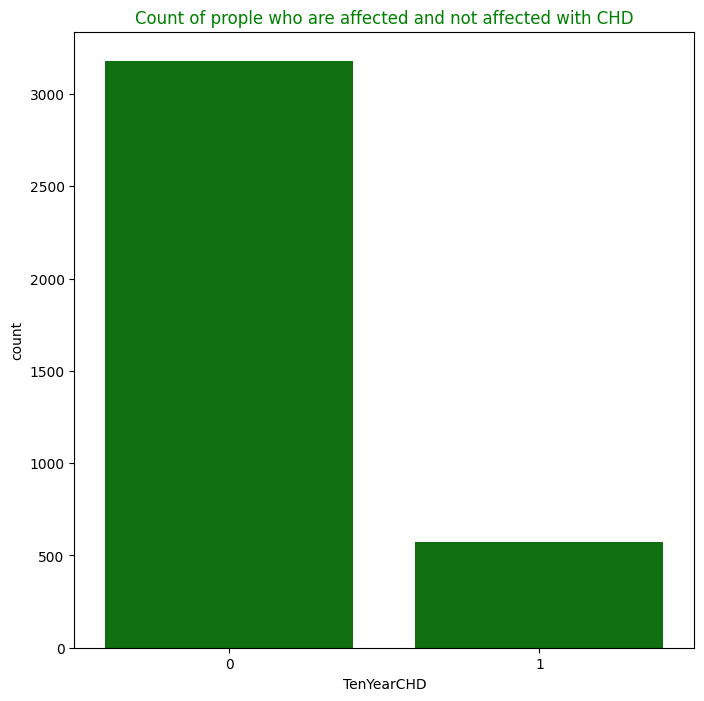

In [11]:
plt.figure(figsize=(8,8))
sns.countplot(x='TenYearCHD',data=df, color='green')
plt.title("Count of prople who are affected and not affected with CHD", color='green')
plt.show()

We can see that majority of people ase not affected with CHD.

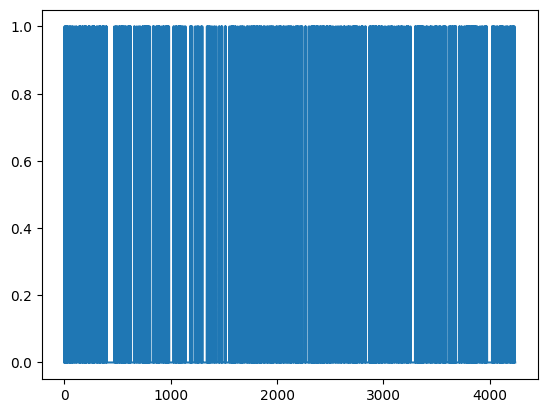

In [12]:
plt.plot(df['TenYearCHD'])
plt.show()

Here also we can see majority of people are not affected by CHD.



---



Steps to Build a Model
1. Feature and Target Extraction.
2. Normalizing the features.
3. Splitting the dataset for Training and Testing
4. Model Building
5. Model Evaluation

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Feature Extraction
x = np.asarray(df[['age','sex','cigsPerDay','totChol','sysBP','glucose']])
y = np.asarray(df['TenYearCHD'])

#Normalizing the features(x)
x = StandardScaler().fit(x).transform(x)

#Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3000, 6), (751, 6), (3000,), (751,))

In [16]:
#model building
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [17]:
#Evaluation of Model
from sklearn.metrics import accuracy_score
print("Accuracy of the model is = ",accuracy_score(y_test, logreg.predict(x_test)))

Accuracy of the model is =  0.8308921438082557
